In [1]:
import numpy as np
from math import log
import matplotlib.pyplot as plt

In [75]:
def runge_kutt_1(f, u0, t):
    u = [u0]
    for i in range(len(t) - 1):
        tau = t[i + 1] - t[i]
        w1 = f(u[-1], t[i])
        w2 = f(u[-1] + tau*w1/2, t[i] + tau/2)
        w3 = f(u[-1] + tau*w2/2, t[i] + tau/2)
        w4 = f(u[-1] + tau*w3, t[i] + tau)
        u.append(u[-1] + tau * (w1 + 2*w2 +2*w3 + w4)/6)
    return u

def uni_runge_kutt(A, a, b, f, u0, t):
    u = [u0]
    for i in range(len(t) - 1):
        tau = t[i + 1] - t[i]
        omega = np.zeros(len(a))
        for j in range(len(a)):
            omega[j] = f(u[-1] + tau * (omega @ A[j, :].T).item(), t[i] + tau * a[j].item())
        u.append(u[-1] + tau * (omega @ b.T).item())
    return u

def effective_p(U2, U1, U0, r):
    return np.log((U2 - U1) / (U1 - U0)) / np.log(r)

Number of intervals: 1
Error between two funcs: 4.440892098500626e-16

Number of intervals: 2
Error between two funcs: 4.440892098500626e-16

Number of intervals: 4
Error between two funcs: 4.440892098500626e-16

Number of intervals: 8
Error between two funcs: 0.0

Number of intervals: 16
Error between two funcs: 2.220446049250313e-16

Number of intervals: 32
Error between two funcs: 0.0

Number of intervals: 64
Error between two funcs: 8.881784197001252e-16

Number of intervals: 128
Error between two funcs: 4.440892098500626e-16

Number of intervals: 256
Error between two funcs: 1.3322676295501878e-15



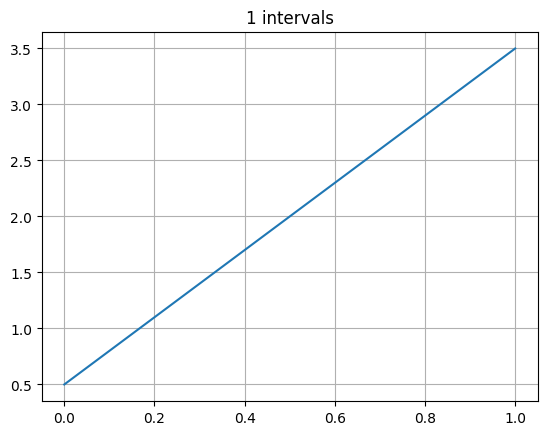

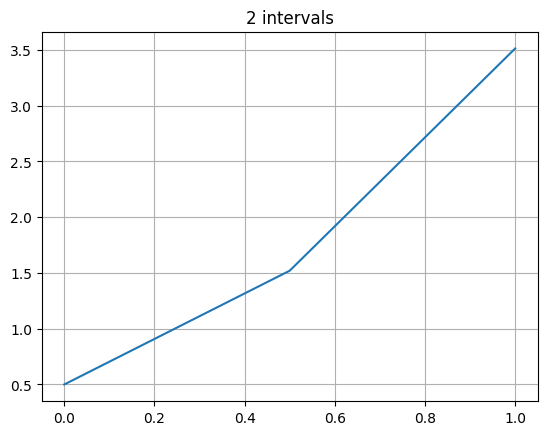

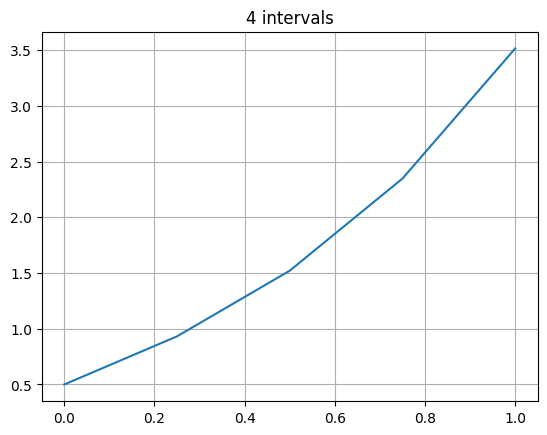

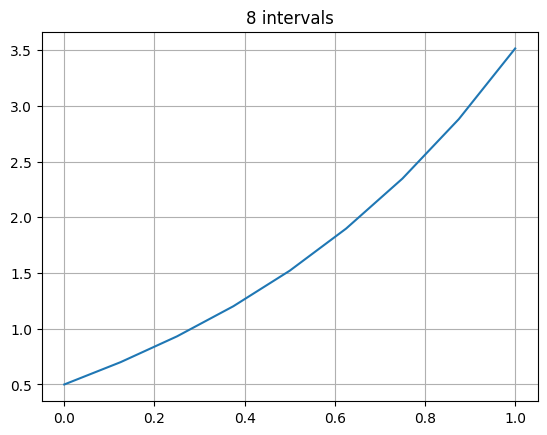

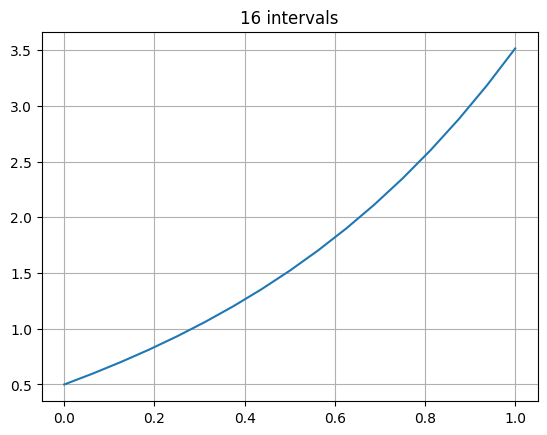

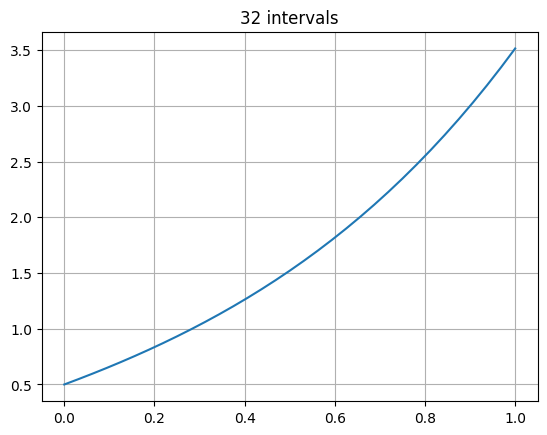

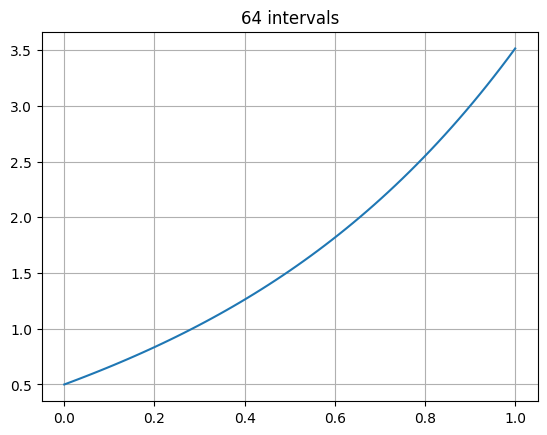

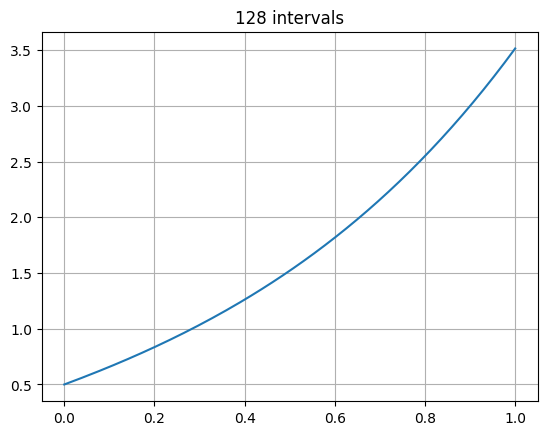

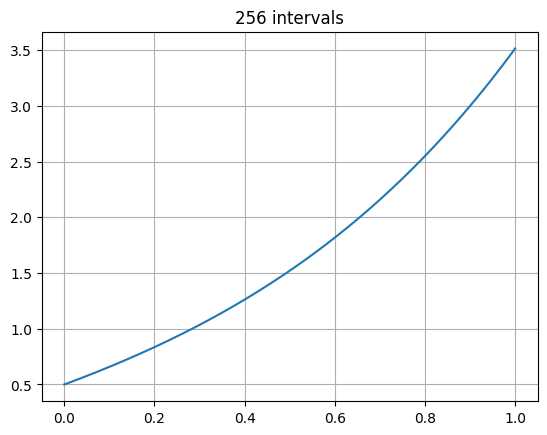

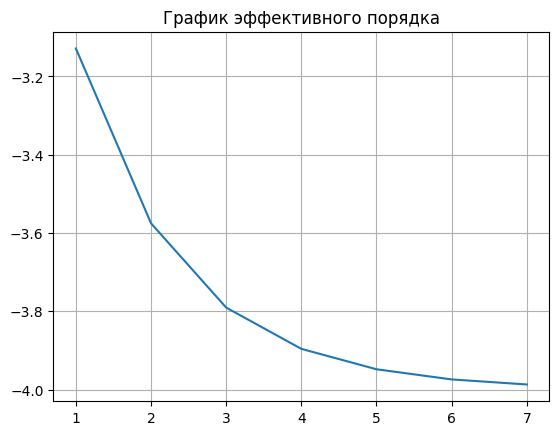

In [80]:
f = lambda u, t: u + t ** 2 + 1
u0 = 0.5

A = np.matrix('0 0 0 0; 0.5 0 0 0; 0 0.5 0 0; 0 0 1 0')
a = np.matrix('0; 0.5; 0.5; 1')
b = np.matrix([[1/6, 1/3, 1/3, 1/6]])

U = []

for i in range(9):
    t = np.linspace(0, 1, 2 ** i + 1)
    print("Number of intervals:", 2 ** i)
    U.append(uni_runge_kutt(A, a, b, f, u0, t))
    print("Error between two funcs:", max([abs(x - y) for x, y in zip(runge_kutt_1(f, u0, t), U[-1])]))
    print()
    plt.figure()
    plt.title(f"{2 ** i} intervals")
    plt.plot(t, U[-1])
    plt.grid(True)

p = [effective_p(U[i + 2][-1], U[i + 1][-1], U[i][-1], 2) for i in range(len(U) - 2)]
plt.figure()
plt.plot([i for i in range(1, len(p) + 1)], p)
plt.title("График эффективного порядка")
plt.grid(True)

Теперь протестируем 7-стадийную схему Хаммуда и сравним ее с 4-стадийной, реализованной ранее.

Number of intervals: 1
Error between two funcs: 0.01339285714285765

Number of intervals: 2
Error between two funcs: 0.0015308261496911335

Number of intervals: 4
Error between two funcs: 0.00012809206701547282

Number of intervals: 8
Error between two funcs: 9.23119618434498e-06

Number of intervals: 16
Error between two funcs: 6.189400756362318e-07

Number of intervals: 32
Error between two funcs: 4.005666687234566e-08

Number of intervals: 64
Error between two funcs: 2.5474156117866187e-09



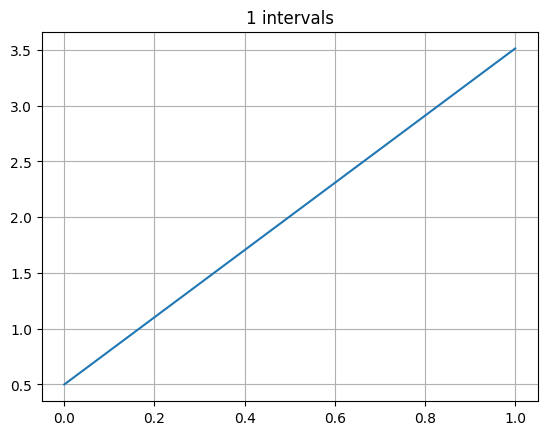

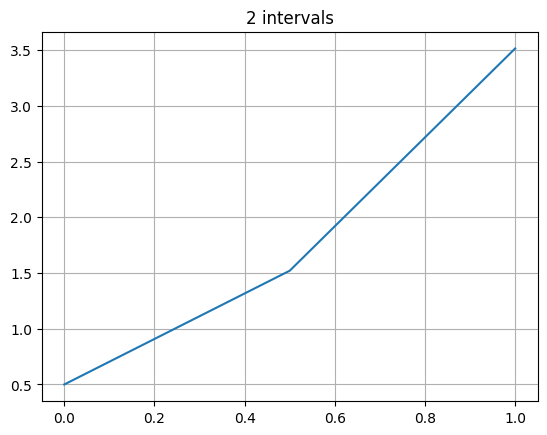

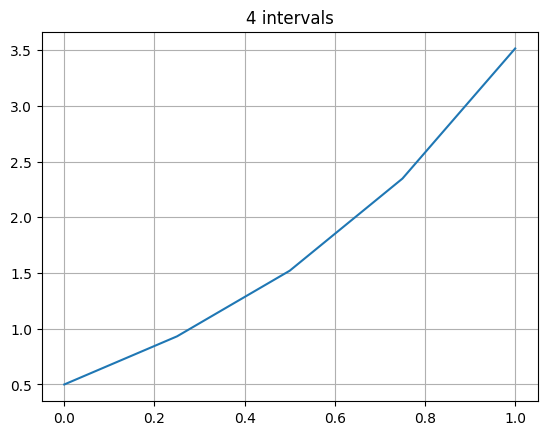

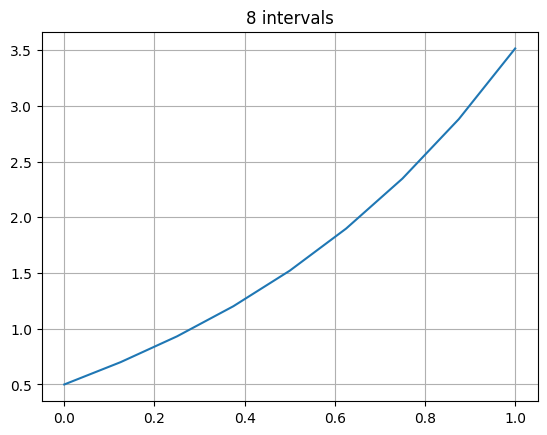

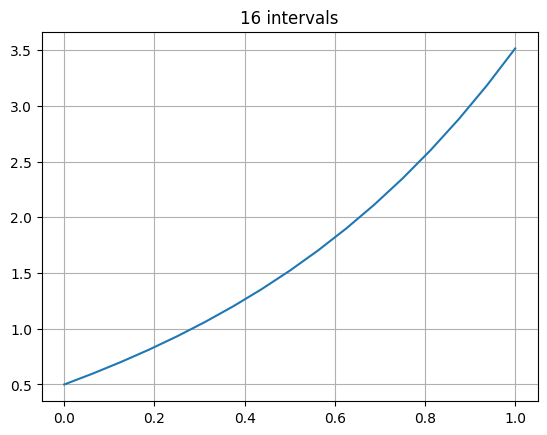

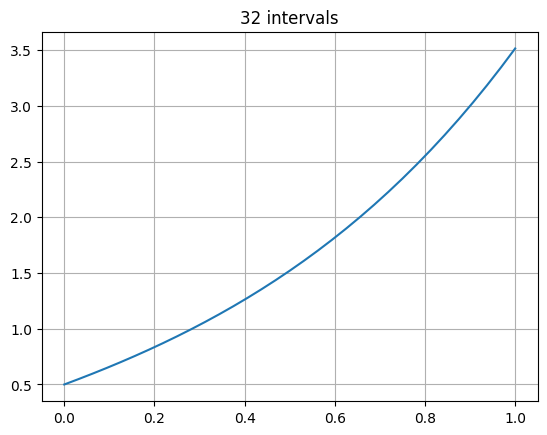

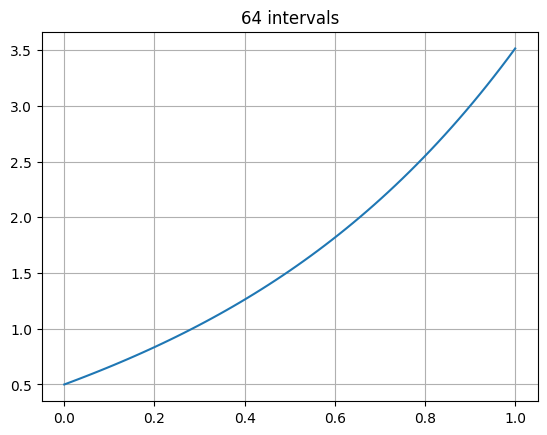

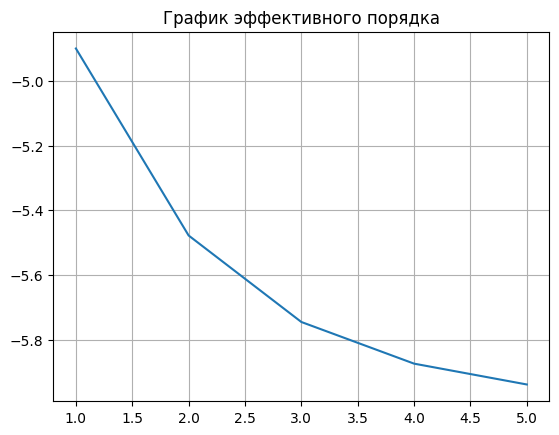

In [87]:
A = np.matrix([[0, 0, 0, 0, 0, 0, 0], [4/7, 0, 0, 0, 0, 0, 0], [115/112, -5/16, 0, 0, 0, 0, 0], 
                [589/630, 5/18, -16/45, 0, 0, 0, 0], [229/1200-29/6000*5**0.5, 119/240-187/1200*5**0.5, -14/75+34/375*5**0.5, -3/100*5**0.5, 0, 0, 0],
                [71/2400-587/12000*5**0.5, 187/480-391/2400*5**0.5, -38/75+26/375*5**0.5, 27/80-3/400*5**0.5, (1+5**0.5)/4, 0, 0],
                [-49/480+43/160*5**0.5, -425/96+51/32*5**0.5, 52/15-4/5*5**0.5, -27/16+3/16*5**0.5, 5/4-3/4*5**0.5, 5/2-0.5*5**0.5, 0]])
a = np.matrix([[0], [4/7], [5/7], [6/7], [(5-5**0.5)/10], [(5+5**0.5)/10], [1]])
b = np.matrix([[1/12, 0, 0, 0, 5/12, 5/12, 1/12]])

U = []

for i in range(7):
    t = np.linspace(0, 1, 2 ** i + 1)
    print("Number of intervals:", 2 ** i)
    U.append(uni_runge_kutt(A, a, b, f, u0, t))
    print("Error between two funcs:", max([abs(x - y) for x, y in zip(runge_kutt_1(f, u0, t), U[-1])]))
    print()
    plt.figure()
    plt.title(f"{2 ** i} intervals")
    plt.plot(t, U[-1])
    plt.grid(True)

p = [effective_p(U[i + 2][-1], U[i + 1][-1], U[i][-1], 2) for i in range(len(U) - 2)]
plt.figure()
plt.plot([i for i in range(1, len(p) + 1)], p)
plt.title("График эффективного порядка")
plt.grid(True)